In [13]:
#Import the libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as pyplot
from matplotlib import style
import pickle
from sklearn.metrics import confusion_matrix

In [14]:
#Read in the csv file
data = pd.read_csv("default_of_credit_card_clients.csv", sep=",")


In [15]:
#Create the array with the desired attributes
data = data[["LIMIT_BAL","BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1",
             "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6", "default payment next month"]]

print(data.head()) #This prints out the first 5 rows of the data frame and allows us to check that its reading in correctly

   LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0      20000       3913       3102        689          0          0   
1     120000       2682       1725       2682       3272       3455   
2      90000      29239      14027      13559      14331      14948   
3      50000      46990      48233      49291      28314      28959   
4      50000       8617       5670      35835      20940      19146   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0          0         0       689         0         0         0         0   
1       3261         0      1000      1000      1000         0      2000   
2      15549      1518      1500      1000      1000      1000      5000   
3      29547      2000      2019      1200      1100      1069      1000   
4      19131      2000     36681     10000      9000       689       679   

   default payment next month  
0                           1  
1                           1  
2                   

In [16]:
#This is the attribute we will try to predict
predict = "default payment next month"

In [17]:
#This creates the training sets and testing sets
X = np.array(data.drop([predict], 1))
y = np.array(data[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.5)

C:\Users\jorda\AppData\Local\Temp\ipykernel_20360\2457470803.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop([predict], 1))


In [18]:
#This code trains the model by going through 30 training runs and saves the best model
best = 0
for _ in range(30): #The number of training runs can be increased by changing 30 to the desired amount
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.5) 
    #The amount of data in the testing set can be changed by changing test_size's valule which is a percentage of the data
    
    model = LogisticRegression() # This line creates the model

    model.fit(x_train, y_train) # This fits the training data to the model
    acc = model.score(x_test, y_test)
    print(acc) #This allows us to see the score for each training run

    if acc > best: #If the model is better than the current best it overwrites the previous best
        best = acc
        with open("defaultmodel.pickle", "wb") as f:
            pickle.dump(model, f)
print("Best score: ", best) #This shows us which model we currently have and what it scored for accuracy 
pickle_in = open("defaultmodel.pickle", "rb")
model = pickle.load(pickle_in)

0.7746
0.7769333333333334
0.7793333333333333
0.7851333333333333
0.7754666666666666
0.7793333333333333
0.7792666666666667
0.775
0.7797333333333333
0.7817333333333333
0.7762666666666667
0.7769333333333334
0.7786666666666666
0.7768666666666667
0.779
0.7782
0.7796
0.7795333333333333
0.7812666666666667
0.7797333333333333
0.7755333333333333
0.7812666666666667
0.7766
0.7779333333333334
0.7756666666666666
0.7776666666666666
0.7778666666666667
0.7805333333333333
0.7788666666666667
0.7800666666666667
Best score:  0.7851333333333333


In [19]:
%matplotlib inline

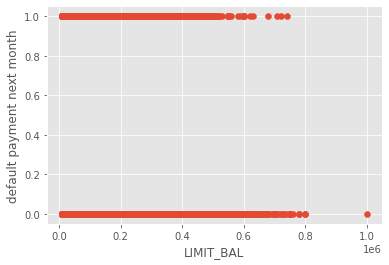

In [20]:
p = "LIMIT_BAL"
style.use("ggplot")
pyplot.scatter(data[p], data["default payment next month"])
pyplot.xlabel(p)
pyplot.ylabel("default payment next month")
pyplot.show()

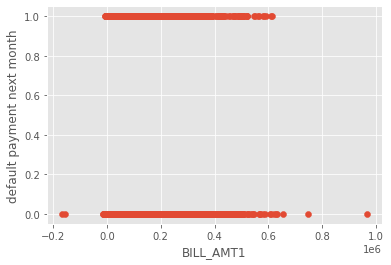

In [21]:
p = "BILL_AMT1"
style.use("ggplot")
pyplot.scatter(data[p], data["default payment next month"])
pyplot.xlabel(p)
pyplot.ylabel("default payment next month")
pyplot.show()

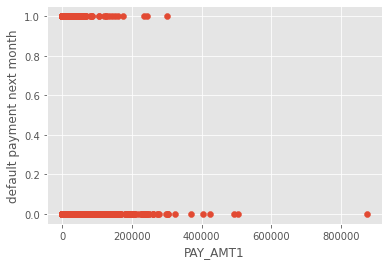

In [22]:
p = "PAY_AMT1"
style.use("ggplot")
pyplot.scatter(data[p], data["default payment next month"])
pyplot.xlabel(p)
pyplot.ylabel("default payment next month")
pyplot.show()

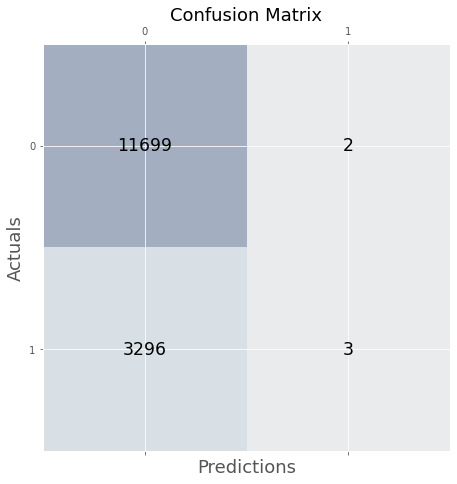

Customer ID:  5988
Customer ID:  8862
Customer ID:  10837
Customer ID:  10961
Customer ID:  12722


In [25]:
#This code uses the model to predict which customers will default next
predictions = model.predict(x_test)
#This stores the models predictions in a variable, 
#and takes the full list of customers without the default attribute

#Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true = y_test, y_pred = predictions)
fig, ax = pyplot.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=pyplot.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
pyplot.xlabel('Predictions', fontsize=18)
pyplot.ylabel('Actuals', fontsize=18)
pyplot.title('Confusion Matrix', fontsize=18)
pyplot.show()

for x in range(len(predictions)): 
    #This loop walks through all the predictions and provides the customerIDs for the customers
    #predicted to default.
    if predictions[x] == 1:
        print("Customer ID: ", x)